Fit 3rd order Polynomial to graph data using numpy

In [1]:
from matplotlib import pyplot as plt
plt.rcParams["font.size"] = 20
import numpy as np

data

In [2]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='d')
dx =  np.array([0.1,0.1,0.5,0.1,0.5,0.1,0.5,0.1,0.5,0.1], dtype='d')
y = np.array([1.1 ,2.3 ,2.7 ,3.2 ,3.1 ,2.4 ,1.7 ,1.5 ,1.5  ,1.7 ], dtype='d')
dy = np.array([0.15,0.22,0.29,0.39,0.31,0.21,0.13,0.15,0.19,0.13], dtype='d')

create numpy array with weights as 1/error 

In [3]:
ones = np.ones(10, dtype='d')
weight = ones/dy

various fit options

In [4]:
n = 3 
#model = np.polyfit(x, y, n, 0 , 0, weight, cov='unscaled' )
#model, fitCov = np.polyfit(x, y, n , 0 , 0, weight, cov='unscaled' )
model, fitCov = np.polyfit(x, y, n , 0 , 0, weight, cov='unscaled' )


monitor printout of coefficient polynomial vector (model)  and covariance matrix (fitCov)

In [5]:
print (model)
print (fitCov)

[ 0.02590585 -0.48405665  2.52045767 -0.98073638]
[[ 1.19801683e-05 -2.07833174e-04  9.95675425e-04 -9.97263377e-04]
 [-2.07833174e-04  3.65835615e-03 -1.78482005e-02  1.83096634e-02]
 [ 9.95675425e-04 -1.78482005e-02  8.93452262e-02 -9.59887600e-02]
 [-9.97263377e-04  1.83096634e-02 -9.59887600e-02  1.19001618e-01]]


prepare errors for plotting, see
https://stackoverflow.com/questions/28505008/numpy-polyfit-how-to-get-1-sigma-uncertainty-around-the-estimated-curve/28528966
write polynomial as np.dot(yy, model)  with yy=[x**n, x*n-1, ..., 1] and  x can be a single value or 
or a vector and  model as coefficient vector. Since this a linear equation, with the covariance matrix
fitCov of model, the covariance matrix of the values is np.dot(yy, np.dot(model, yy.T)).

Do the interpolation for plotting

In [6]:
x_plot = np.linspace(0.1, 10.5, 500)

Matrix with rows 1, x, x**2, ...

In [7]:
YY = np.vstack([x_plot**(n-i) for i in range(n+1)]).T

matrix multiplication calculates the polynomial values

In [8]:
y_plot = np.dot(YY, model)

Covariance_y = YY*Covariance*YY.T

In [9]:
fitCov_y_plot = np.dot(YY, np.dot(fitCov, YY.T))
Sigma_y_plot = np.sqrt(np.diag(fitCov_y_plot))

model contains parameters in order highest power first! Define fit function 

In [10]:
def fitpol3(model):
    return model[3] + model[2]*x + model[1]*x**2 + model[0]*x**3

construct polynomial from coefficients in model

In [11]:
predict = np.poly1d(model)

r_2 coefficient of the determination of the regression score function
input are the y data values and the prediction from the fit with x data values 
this is borrowed from scikit-learn

In [12]:
from sklearn.metrics import r2_score
p = r2_score(y, predict(x))
print (p)

0.9486643210376879


plot data

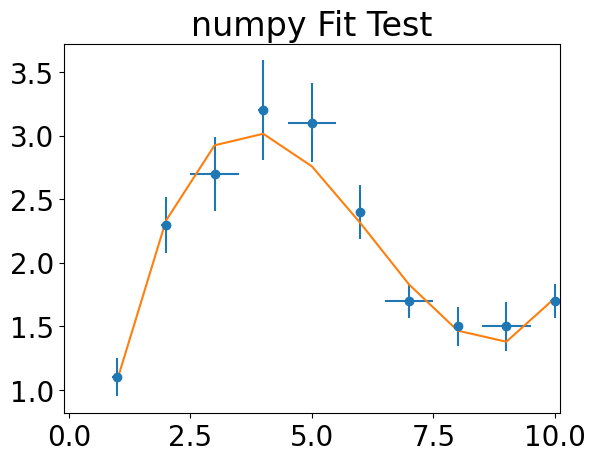

In [13]:
plt.figure()
plt.errorbar(x, y, dy , dx, fmt="o")
plt.plot(x, fitpol3(model) )
plt.title("numpy Fit Test")
plt.xlim(-0.1, 10.1)
plt.show()

plot data with covariance

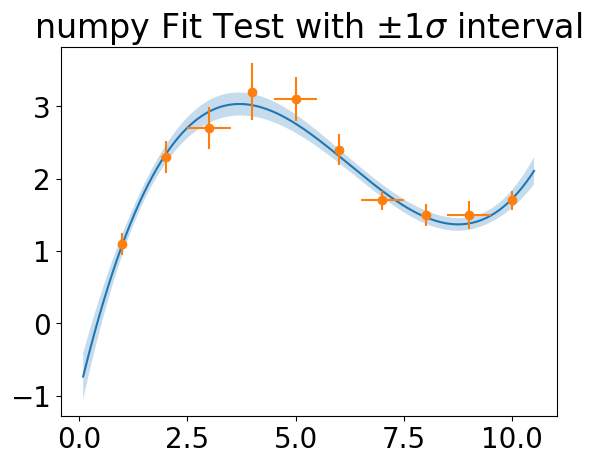

In [14]:
fg, ax = plt.subplots(1, 1)
ax.set_title("numpy Fit Test with $\pm1\sigma$ interval")
ax.fill_between(x_plot, y_plot+Sigma_y_plot, y_plot-Sigma_y_plot, alpha=.25)
ax.plot(x_plot, y_plot,'-')
ax.errorbar(x, y,dy , dx, fmt='o')
ax.axis('tight')

fg.canvas.draw()
plt.show()